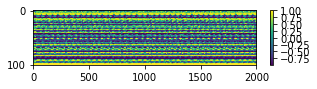

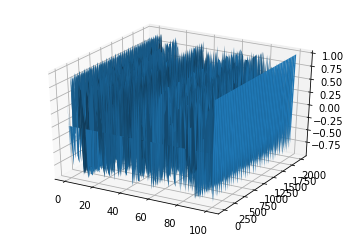

test error: 
0.3069330637244667


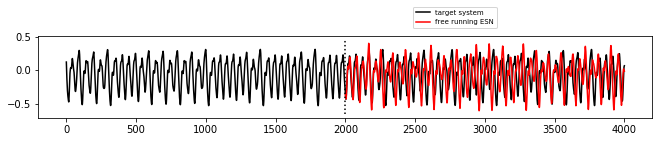

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 100,
          spectral_radius = 1.5,
          random_state=42)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen],inspect=True)

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.show()

In [2]:
esn.W

array([[-0.06118766,  0.21981653,  0.11314507, ..., -0.03533875,
        -0.23145642, -0.1912341 ],
       [-0.22852528,  0.06652832, -0.09053989, ...,  0.19367346,
         0.18878477,  0.13649727],
       [ 0.06926983, -0.20281786, -0.16502605, ..., -0.13859608,
         0.05993455, -0.20222895],
       ...,
       [ 0.13691532, -0.13899418,  0.10516697, ...,  0.07088608,
        -0.04158395,  0.20988529],
       [ 0.13893943, -0.14630776, -0.18004077, ...,  0.08769856,
         0.16139322, -0.22356687],
       [-0.23258227, -0.06193533, -0.17128842, ...,  0.21786259,
        -0.04999583, -0.13795261]])